In [447]:
# Importing Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm,zscore
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pylab as pl
from sklearn.metrics import roc_curve, auc

In [448]:
# Importing Dataset
df = pd.read_csv('energydata_complete.csv')

# List of variables in the dataset
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [449]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [450]:
df.isnull().sum() # There are no missing values in any of the observations

# Dropping the date column
df = df.drop(columns = ['date'])

### Splitting into train and test data sets with 70:30 ratio

In [454]:
x = df[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']]
y = df['Appliances']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0) # xtrain - 13814 obs, xtest - 5921 obs

# Categorizing the target variable
xtrain['energy_high'] = np.where(xtrain.Appliances > xtrain.Appliances.median(),1,0)
xtest['energy_high'] = np.where(xtest.Appliances > xtrain.Appliances.median(),1,0)

xtrain1 = xtrain.iloc[:,1:-1]
xtest1 = xtest.iloc[:,1:-1]

ytrain2 = xtrain.iloc[:,-1]
ytest2 = xtest.iloc[:,-1] # 0's and 1's

# Data Scaling - Standardization - z = (X-mu)/sigma
xtrain1 = (xtrain1-xtrain1.mean())/(xtrain1.std())
xtest1 = (xtest1-xtest1.mean())/(xtest1.std())

train = pd.concat([ytrain,xtrain1,ytrain2],axis=1)
test = pd.concat([ytest,xtest1,ytest2],axis=1)

train.describe()

C:\Users\himaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\himaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,energy_high
count,13814.000000,1.381400e+04,1.381400e+04,1.381400e+04,1.381400e+04,1.381400e+04,1.381400e+04,1.381400e+04,1.381400e+04,1.381400e+04,...,1.381400e+04,1.381400e+04,1.381400e+04,1.381400e+04,1.381400e+04,1.381400e+04,1.381400e+04,1.381400e+04,1.381400e+04,13814.000000
mean,96.934270,-7.504815e-16,-1.410291e-12,-5.453865e-13,-1.077809e-12,-4.726780e-13,-1.026106e-12,-7.132381e-13,-1.207647e-12,-5.186275e-13,...,-4.647934e-13,-2.135303e-15,6.232949e-13,1.284746e-14,1.791836e-15,-5.378056e-15,-3.566071e-16,-1.676506e-16,-1.676506e-16,0.452657
std,101.038862,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.497772
min,10.000000,-4.818650e-01,-3.052102e+00,-3.328942e+00,-1.940867e+00,-4.893742e+00,-2.529711e+00,-3.202021e+00,-2.808790e+00,-2.628116e+00,...,-2.989929e+00,-2.339811e+00,-3.533004e+00,-3.764963e+00,-1.648147e+00,-3.161053e+00,-2.479501e+00,-1.718543e+00,-1.718543e+00,0.000000
25%,50.000000,-4.818650e-01,-5.747304e-01,-7.201901e-01,-6.908084e-01,-6.184129e-01,-7.335015e-01,-7.268081e-01,-6.560265e-01,-7.962427e-01,...,-7.371424e-01,-6.960517e-01,-6.239575e-01,-6.202237e-01,-8.313676e-01,-7.904633e-01,-6.842982e-01,-8.612756e-01,-8.612756e-01,0.000000
50%,60.000000,-4.818650e-01,-5.055100e-02,-1.603937e-01,-1.506972e-01,1.454296e-02,-7.806038e-02,-2.157567e-01,-1.178355e-01,-1.471172e-01,...,-1.667046e-01,-9.145069e-02,7.745092e-02,2.782733e-01,-1.507180e-01,1.408400e-01,-6.595072e-02,-1.197611e-02,-1.197611e-02,0.000000
75%,100.000000,-4.818650e-01,5.734721e-01,7.021370e-01,5.378297e-01,6.951760e-01,5.173404e-01,7.786387e-01,6.160612e-01,7.137634e-01,...,6.692403e-01,5.698317e-01,7.316492e-01,7.949091e-01,5.979966e-01,1.408400e-01,6.680876e-01,8.678010e-01,8.678010e-01,1.000000
max,1080.000000,8.344689e+00,2.857397e+00,5.806299e+00,4.373690e+00,3.843515e+00,3.492343e+00,3.333896e+00,2.622046e+00,2.784343e+00,...,2.841570e+00,3.536155e+00,2.260360e+00,1.356470e+00,3.865115e+00,2.342102e+00,2.810363e+00,1.722904e+00,1.722904e+00,1.000000


#### Checking for normality of the dependent variable Appliances

Text(0.5, 1.0, 'Distribution plot of Appliances')

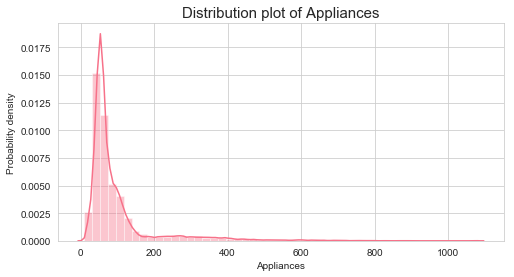

In [457]:
sns.set_palette("husl")
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
sns.distplot(train['Appliances'])
plt.xlabel('Appliances')
plt.ylabel('Probability density')
plt.title('Distribution plot of Appliances',fontsize=15)

#### Distribution of the features including the dependent variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022479B5B048>,
      dtype=object)

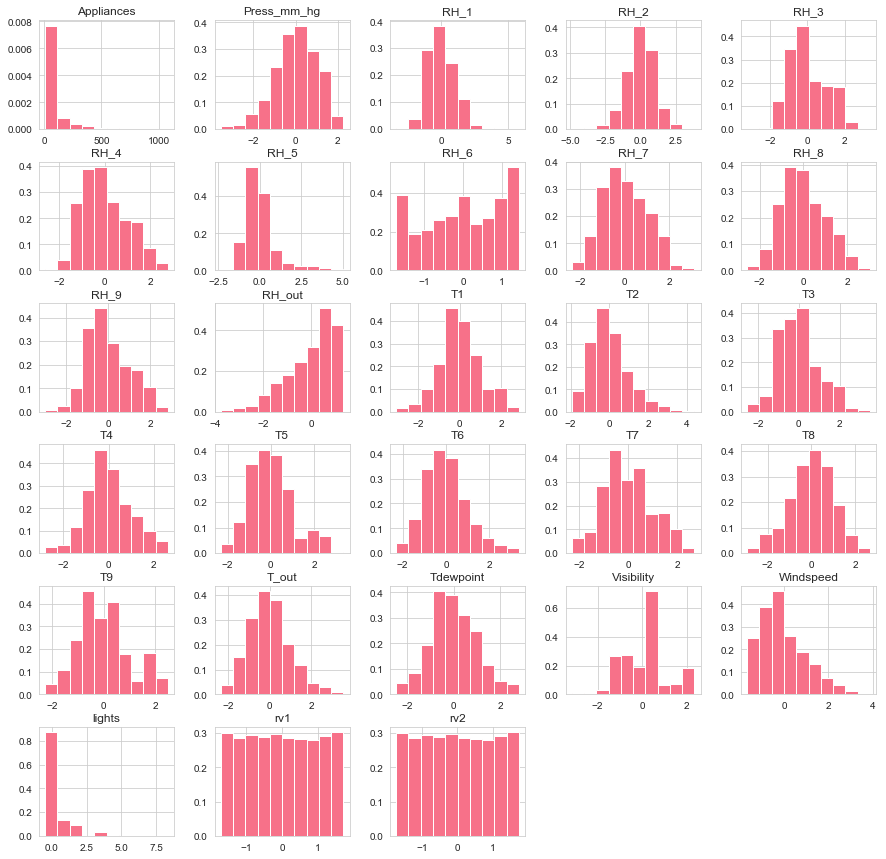

In [77]:
train[train.dtypes[(train.dtypes=="float64")|(train.dtypes=="int64")]
                        .index.values].hist(figsize=[15,15])
# Approximately 11300 of 13814 appliances have energy usage of [10,100]
# Most of the Appliances(82%) in the dataset have energy consumption of less than 100Wh
# Approximately 10500 lights of 13814 have energy usage of [0,10]
# Most of the light fixtures(76%) in the dataset have energy consumption of less than 10Wh

#### Scatter Plots between Appliances and the features

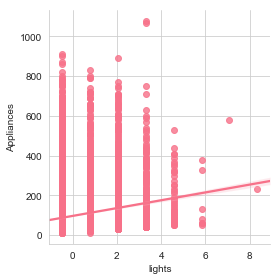

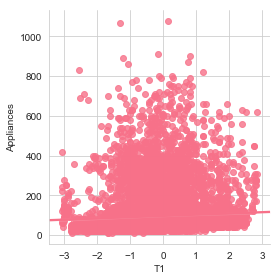

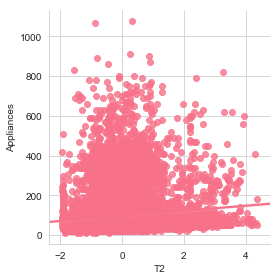

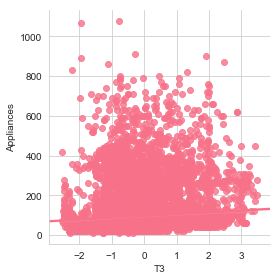

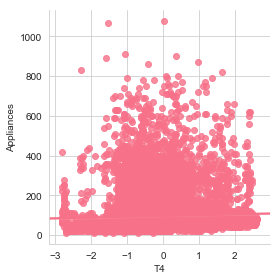

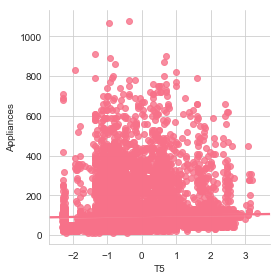

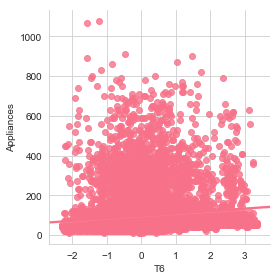

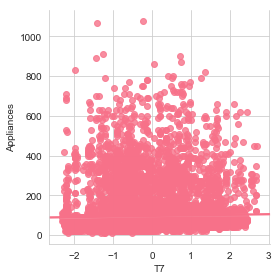

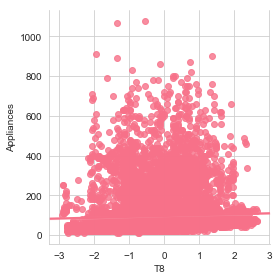

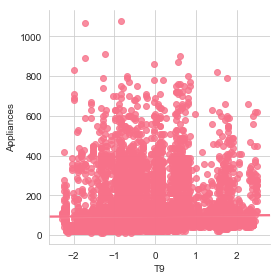

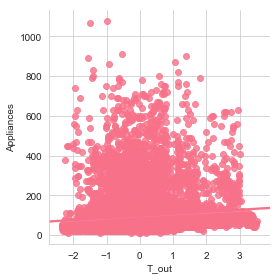

In [79]:
sns.lmplot(x = 'lights', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'T1', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'T2', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'T3', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'T4', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'T5', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'T6', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'T7', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'T8', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'T9', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'T_out', y = 'Appliances', data = train, palette = 'muted', height = 4)

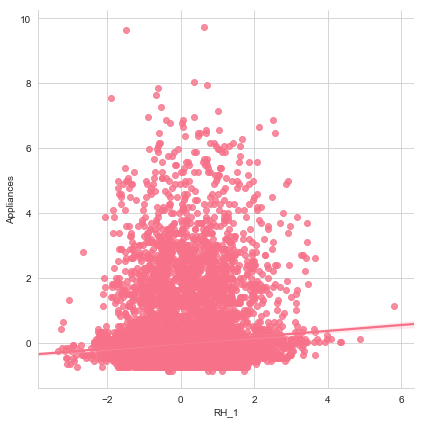

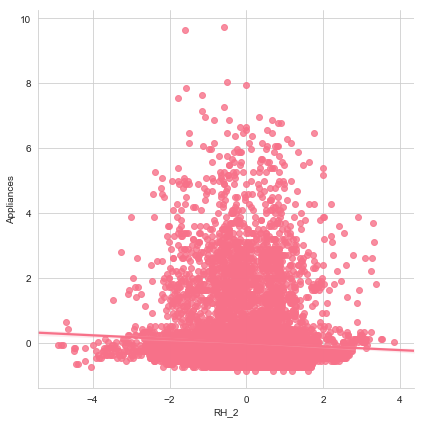

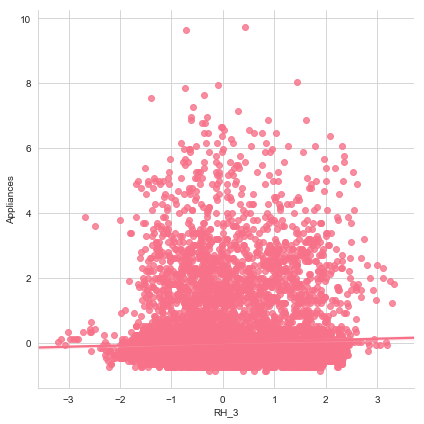

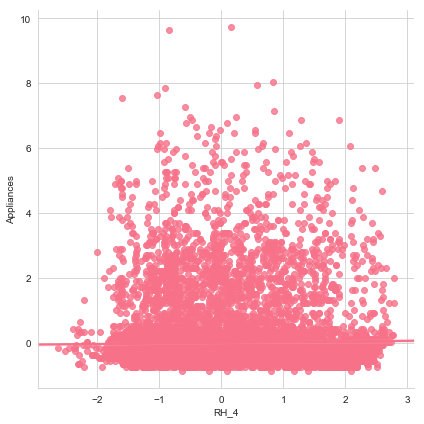

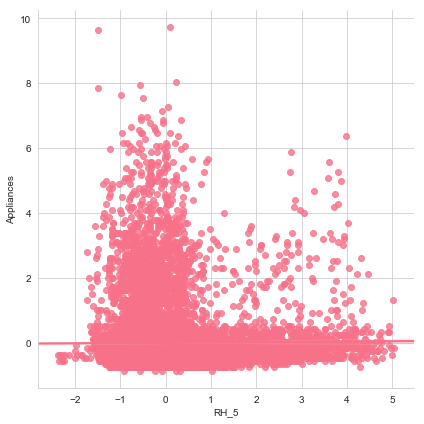

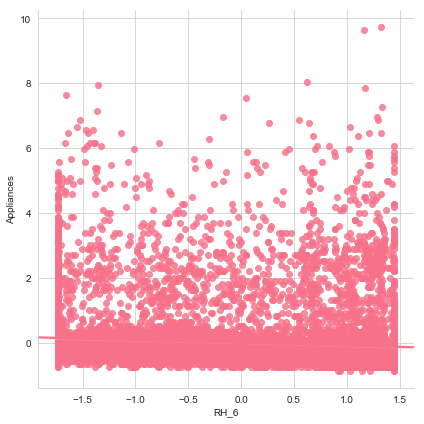

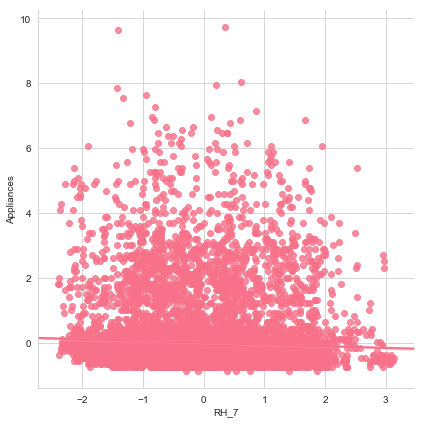

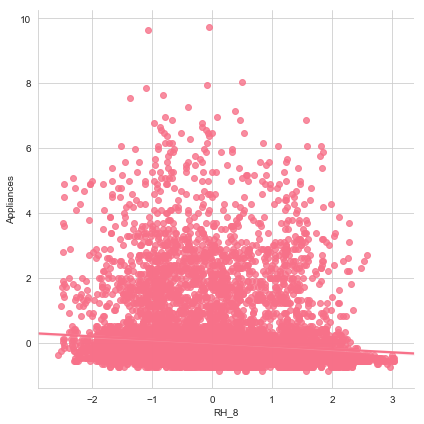

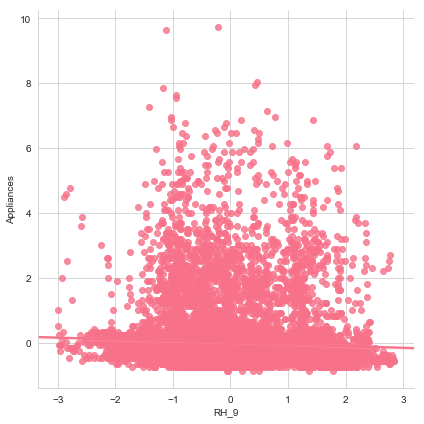

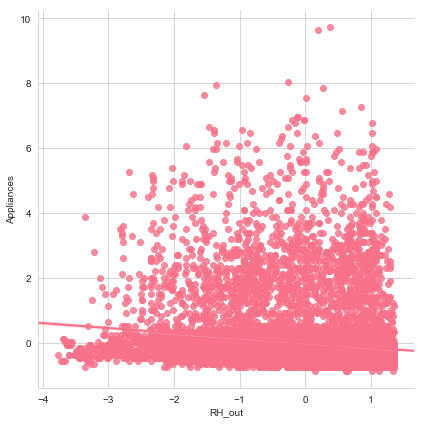

In [118]:
sns.lmplot(x = 'RH_1', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'RH_2', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'RH_3', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'RH_4', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'RH_5', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'RH_6', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'RH_7', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'RH_8', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'RH_9', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'RH_out', y = 'Appliances', data = train, palette = 'muted', height = 4)

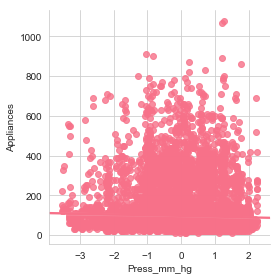

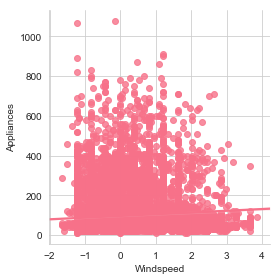

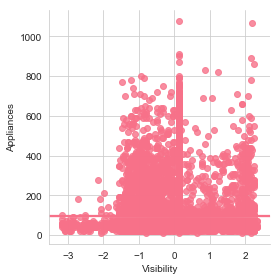

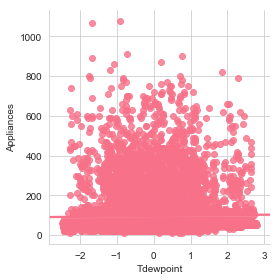

In [80]:
sns.lmplot(x = 'Press_mm_hg', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'Windspeed', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'Visibility', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'Tdewpoint', y = 'Appliances', data = train, palette = 'muted', height = 4)

0.0

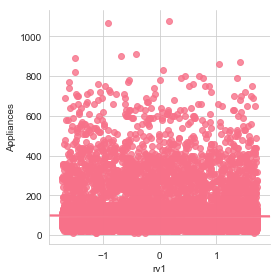

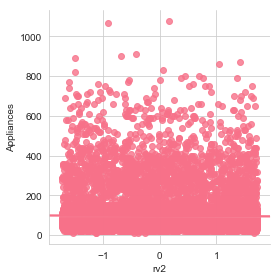

In [85]:
sns.lmplot(x = 'rv1', y = 'Appliances', data = train, palette = 'muted', height = 4)
sns.lmplot(x = 'rv2', y = 'Appliances', data = train, palette = 'muted', height = 4)

diff = train.rv1 - train.rv2
diff.sum() # This indicates that they are identically distributed with zero difference
# The linear relationship with the target variable is a flat line
# which suggest that both the variables are contributing to zero variation in the target variable

#### Correlation matrix

In [86]:
# Correlation of traget variable with the features
train[train.columns[0:]].corr()['Appliances'][:]

Appliances     1.000000
lights         0.194838
T1             0.061839
RH_1           0.090957
T2             0.127060
RH_2          -0.056968
T3             0.090561
RH_3           0.041055
T4             0.040135
RH_4           0.019515
T5             0.025606
RH_5           0.008990
T6             0.121136
RH_6          -0.085386
T7             0.028614
RH_7          -0.053465
T8             0.042959
RH_8          -0.098450
T9             0.012937
RH_9          -0.052228
T_out          0.101776
Press_mm_hg   -0.036038
RH_out        -0.150940
Windspeed      0.085328
Visibility     0.000019
Tdewpoint      0.019867
rv1           -0.011230
rv2           -0.011230
energy_high    0.524402
Name: Appliances, dtype: float64

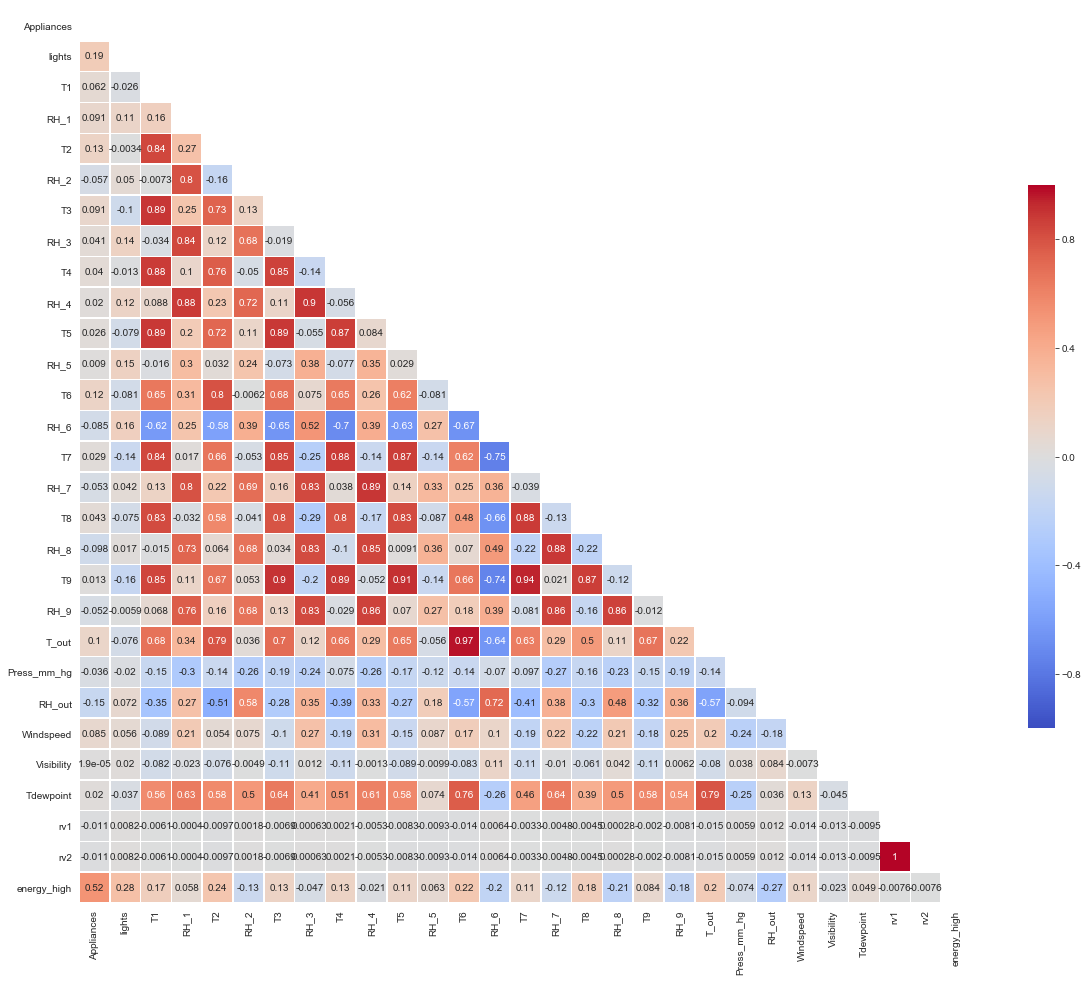

In [460]:
corr = train.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, mask = mask, ax = ax, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})
# Correlation between rv1 and rv2 is 1 which ideally means they are the same
# T1 is highly correlated with T2, T3, T4, T5, T6, T7, T8, T9, T_out
# T9 is showing high correlations with all the other area temperatures(T's)
# Similarly all the RH's are highly correlated
# Tdewpoint is also showing significant correlations with all the other variables

#### Variable selection

In [461]:
# 15 variables selection
# Removing the variables that have very small correlations with the target variable
# T4, T5, T7, T8, T9, RH_3, RH_4, RH_5, Visibility, Tdewpoint, rv1, rv2
# Removing T_out to avoid multicollinearity with T6
xtrain_15vars = train.drop(columns = ['Appliances', 'T5', 'T7', 'T8', 'T9', 'RH_3', 'RH_4', 'RH_5','T_out', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'energy_high'])
xtest_15vars = test.drop(columns = ['Appliances', 'T5', 'T7', 'T8', 'T9', 'RH_3', 'RH_4', 'RH_5', 'T_out', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'energy_high'])
xtrain_15vars.columns

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'T4', 'T6', 'RH_6', 'RH_7',
       'RH_8', 'RH_9', 'Press_mm_hg', 'RH_out', 'Windspeed'],
      dtype='object')

In [104]:
# Ten Random feature selection
xrandvar=[]
for i in sorted(list(np.random.choice(range(1,26),10,replace=False))): xrandvar.append(list(train.columns)[i])
xtrain_10rand = train[xrandvar]
test_10rand = test[xrandvar]
xtrain_10rand.columns

Index(['lights', 'RH_1', 'RH_2', 'T3', 'RH_4', 'T6', 'RH_7', 'T8', 'T9',
       'Visibility'],
      dtype='object')

In [102]:
# Ten best suited features
# Removing all the features having correlations less than 0.06
# Removing T_out to avoid multicollinearity with T6
xtrain_10vars = train.drop(columns = ['Appliances', 'T1', 'T4', 'T5', 'T7', 'T8', 'T9', 'RH_3', 'RH_4', 'RH_5', 'RH_7', 'RH_9', 'T_out', 'Visibility', 'Tdewpoint', 'Press_mm_hg', 'rv1', 'rv2', 'energy_high'])
xtest_10vars = test.drop(columns = ['Appliances', 'T1', 'T4', 'T5', 'T7', 'T8', 'T9', 'RH_3', 'RH_4', 'RH_5', 'RH_7', 'RH_9', 'T_out', 'Visibility', 'Tdewpoint', 'Press_mm_hg', 'rv1', 'rv2', 'energy_high'])
xtrain_10vars.columns

Index(['lights', 'RH_1', 'T2', 'RH_2', 'T3', 'T6', 'RH_6', 'RH_8', 'RH_out',
       'Windspeed'],
      dtype='object')

#### Implementation

In [463]:
x = xtrain_15vars.values
y = ytrain.values
(n,r) = x.shape
ones = np.ones((n,1))
x = np.hstack((ones,x))
r += 1
b = np.linalg.solve(x.T@x,x.T@y)
b

array([ 96.93426958,  18.18618179,   3.26829553,  68.77797069,
       -29.27189955, -54.1651787 ,  44.09221557, -21.82412024,
         7.24558783,  12.39250603,  -5.67494124, -22.34662532,
        -5.05496434,   1.51924159,  -2.56329643,   4.24072548])

In [129]:
# Initial beta parameters
def initial_betas(k,seed=967859):
    np.random.seed(seed)
    return np.random.uniform(-1,1,size=k+1)

In [496]:
# Linear Regression
def gradient_descent_linear_reg(X,y,alpha,beta,threshold=0.0001,iterations=100000):
    m = X.shape[0] # m is the number of samples
    cost_list = []
    rmse_list = []
    z = (np.ones((m,1)),np.array(X))
    X_ones = np.concatenate(z,axis=1)
    for i in range(iterations):
        yhat = X_ones.dot(beta)
        cost_fun = 0.5*np.sum((yhat-y)**2)/m
        rmse = np.sqrt(2*cost_fun)
        gradient = X_ones.T.dot(yhat-y)/m
        beta = beta-(alpha*gradient)
        cost_list = np.append(cost_list,cost_fun)
        num_iter = len(cost_list)
        #val = cost_list[-2]-cost_list[-1]
        if num_iter >= 2:
            if cost_list[-2]-cost_list[-1] > threshold: 
                continue
            else: 
                break
        else: 
            continue
    iterate = np.array(range(1,num_iter+1))
    dum = (cost_list.reshape(-1,1),iterate.reshape(-1,1))
    cost = np.concatenate(dum,axis=1)
    return [alpha,beta,cost,rmse]

In [490]:
# Logistic Regression
def gradient_descent_logistic_reg(X,y,alpha,beta,threshold=0.0001,iterations=100000):
    m = X.shape[0]
    cost_list = []
    rmse_list = []
    z = (np.ones((m,1)),np.array(X))
    X_ones = np.concatenate(z,axis=1)
    for i in range(iterations):
        yhat = 1/(1+np.exp(-1*X_ones.dot(beta)))
        cost_fun = -1*(y.T.dot(np.log(yhat))+(1-y).T.dot(np.log(1-yhat)))/m
        rmse = np.sqrt(2*cost_fun)
        gradient = X_ones.T.dot(yhat-y)/m
        beta = beta-(alpha*gradient)
        cost_list = np.append(cost_list,cost_fun)
        num_iter = len(cost_list)
        # val = cost_list[-2]-cost_list[-1]
        if num_iter >= 2:
            if cost_list[-2]-cost_list[-1] > threshold: 
                continue
            else: 
                break
        else: 
            continue
    iterate = np.array(range(1,num_iter+1))
    dum = (cost_list.reshape(-1,1),iterate.reshape(-1,1))
    cost = np.concatenate(dum,axis=1)
    return [alpha,beta,cost,rmse]

#### 15 variables

##### Train Data 

In [497]:
x = xtrain_15vars.values
y = ytrain.values
(n,r) = x.shape
ones = np.ones((n,1))
x = np.hstack((ones,x))
r += 1
b = np.linalg.solve(x.T@x,x.T@y)
b

array([ 96.93426958,  18.18618179,   3.26829553,  68.77797069,
       -29.27189955, -54.1651787 ,  44.09221557, -21.82412024,
         7.24558783,  12.39250603,  -5.67494124, -22.34662532,
        -5.05496434,   1.51924159,  -2.56329643,   4.24072548])

In [464]:
initial_betas(xtrain_15vars.shape[1])

array([ 0.39293837, -0.42772133, -0.54629709,  0.10262954,  0.43893794,
       -0.15378708,  0.9615284 ,  0.36965948, -0.0381362 , -0.21576496,
       -0.31364397,  0.45809941, -0.12285551, -0.88064421, -0.20391149,
        0.47599081])

In [ ]:
# Linear Reg

In [349]:
import time
st = time.time()
alpha0,beta0,cost0,rmse0 = gradient_descent_linear_reg(xtrain_15vars, ytrain, 0.3, initial_betas(xtrain_15vars.shape[1]))
print(time.time()-st)

2.805492639541626


In [350]:
alpha0,beta0,cost0,rmse0

(0.3, array([ 96.93426958,  18.19845539,   2.84984368,  68.32456289,
        -28.6305172 , -53.62082607,  44.15118057, -21.8486836 ,
          7.1127313 ,  12.41390736,  -5.71500982, -22.32589739,
         -5.09993285,   1.52132831,  -2.64062838,   4.24764031]), array([[9.75039317e+03, 1.00000000e+00],
        [7.12516399e+03, 2.00000000e+00],
        [5.83994066e+03, 3.00000000e+00],
        ...,
        [4.30764175e+03, 8.25000000e+02],
        [4.30764165e+03, 8.26000000e+02],
        [4.30764155e+03, 8.27000000e+02]]), 92.8185492827843)

In [351]:
gradient_descent_linear_reg(xtrain_15vars, ytrain, 0.1, initial_betas(xtrain_15vars.shape[1]))

[0.1, array([ 96.93426958,  18.20758122,   2.5387217 ,  67.98743899,
        -28.1536285 , -53.21607923,  44.19501016, -21.86694966,
          7.01394874,  12.42981282,  -5.7448068 , -22.31048258,
         -5.13336568,   1.52287908,  -2.69812481,   4.25278129]), array([[9.75039317e+03, 1.00000000e+00],
        [8.74635521e+03, 2.00000000e+00],
        [7.95564803e+03, 3.00000000e+00],
        ...,
        [4.30766127e+03, 2.15800000e+03],
        [4.30766117e+03, 2.15900000e+03],
        [4.30766107e+03, 2.16000000e+03]]), 92.81875961345752]

In [465]:
gradient_descent_linear_reg(xtrain_15vars, ytrain, 0.03, initial_betas(xtrain_15vars.shape[1]))

[0.03, array([ 96.93426958,  18.22532372,   1.93394709,  67.33199712,
        -27.22646071, -52.42913909,  44.28009192, -21.90248692,
          6.82190281,  12.4606644 ,  -5.80278732, -22.28048253,
         -5.19833799,   1.52588602,  -2.80988518,   4.26277199]), array([[9.75039317e+03, 1.00000000e+00],
        [9.43564082e+03, 2.00000000e+00],
        [9.14281962e+03, 3.00000000e+00],
        ...,
        [4.30772950e+03, 6.02400000e+03],
        [4.30772940e+03, 6.02500000e+03],
        [4.30772930e+03, 6.02600000e+03]]), 92.81949477227856]

In [466]:
gradient_descent_linear_reg(xtrain_15vars, ytrain, 0.01, initial_betas(xtrain_15vars.shape[1]))

[0.01, array([ 96.93426958,  18.25404782,   0.95577848,  66.27082153,
        -25.7254271 , -51.15485676,  44.41671397, -21.96022147,
          6.51106637,  12.51001853,  -5.89708283, -22.23164921,
         -5.30329072,   1.53068608,  -2.99061669,   4.2789081 ]), array([[9.75039317e+03, 1.00000000e+00],
        [9.64418611e+03, 2.00000000e+00],
        [9.54050997e+03, 3.00000000e+00],
        ...,
        [4.30792473e+03, 1.48570000e+04],
        [4.30792463e+03, 1.48580000e+04],
        [4.30792453e+03, 1.48590000e+04]]), 92.82159807644096]

In [354]:
gradient_descent_linear_reg(xtrain_15vars, ytrain, 0.001, initial_betas(xtrain_15vars.shape[1]))

[0.001, array([ 96.93426958,  18.40064941,  -3.93295078,  60.83056988,
        -18.04575616, -44.59714658,  44.97489969, -22.27786925,
          4.93595207,  12.6966032 ,  -6.435273  , -21.94866915,
         -5.81192975,   1.54692142,  -3.89207957,   4.35631381]), array([[9.75039317e+03, 1.00000000e+00],
        [9.73971443e+03, 2.00000000e+00],
        [9.72906144e+03, 3.00000000e+00],
        ...,
        [4.31055482e+03, 8.12290000e+04],
        [4.31055472e+03, 8.12300000e+04],
        [4.31055462e+03, 8.12310000e+04]]), 92.84992861363081]

In [ ]:
# Logistic Reg

In [360]:
import time
st = time.time()
alpha2,beta2,cost2,rmse2 = gradient_descent_logistic_reg(xtrain_15vars, ytrain2, 0.01, initial_betas(xtrain_15vars.shape[1]))
print(time.time()-st)

1.5183124542236328


In [361]:
alpha2,beta2,cost2,rmse2

(0.01, array([-0.0591204 ,  0.41673081, -0.6531689 ,  0.31429915,  0.4282338 ,
        -0.16324883,  0.64907621,  0.09564742, -0.1031262 ,  0.00426151,
        -0.43489292,  0.12559157, -0.35915098, -0.33915922, -0.22852513,
         0.30477638]), array([[9.30992589e-01, 1.00000000e+00],
        [9.29019939e-01, 2.00000000e+00],
        [9.27058486e-01, 3.00000000e+00],
        ...,
        [5.90571582e-01, 6.64000000e+02],
        [5.90471496e-01, 6.65000000e+02],
        [5.90371712e-01, 6.66000000e+02]]), 1.0866201840108267)

##### Test Data

In [259]:
initial_betas(xtest_15vars.shape[1])

array([ 0.39293837, -0.42772133, -0.54629709,  0.10262954,  0.43893794,
       -0.15378708,  0.9615284 ,  0.36965948, -0.0381362 , -0.21576496,
       -0.31364397,  0.45809941, -0.12285551, -0.88064421, -0.20391149,
        0.47599081])

In [407]:
gradient_descent_linear_reg(xtest_15vars, ytest, 0.3, initial_betas(xtest_15vars.shape[1]))

[0.3, array([ 99.46968417,  19.96217106,   4.7243921 ,  75.58304932,
        -44.91694213, -65.3097128 ,  39.70826805, -11.23476775,
         10.29893661,  11.95855692, -12.5878619 , -13.1431    ,
         -1.47214042,  -0.5521611 ,  -4.71679758,   2.96705622]), array([[1.05010972e+04, 1.00000000e+00],
        [7.73321726e+03, 2.00000000e+00],
        [6.38272759e+03, 3.00000000e+00],
        ...,
        [4.79769261e+03, 8.80000000e+02],
        [4.79769251e+03, 8.81000000e+02],
        [4.79769241e+03, 8.82000000e+02]]), 97.95603518107697]

In [495]:
gradient_descent_linear_reg(xtest_15vars, ytest, 0.1, initial_betas(xtest_15vars.shape[1]))

[0.1, array([ 99.46968417,  19.95021207,   5.10887419,  76.02155346,
        -45.52523815, -65.83498883,  39.65111192, -11.20522281,
         10.41776568,  11.93112611, -12.53936304, -13.16602353,
         -1.43984777,  -0.55174222,  -4.63771963,   2.96026993]), array([[1.05010972e+04, 1.00000000e+00],
        [9.44631828e+03, 2.00000000e+00],
        [8.61282286e+03, 3.00000000e+00],
        ...,
        [4.79768273e+03, 4.36000000e+03],
        [4.79768273e+03, 4.36100000e+03],
        [4.79768273e+03, 4.36200000e+03]]), 97.95593628471146]

In [357]:
gradient_descent_linear_reg(xtest_15vars, ytest, 0.03, initial_betas(xtest_15vars.shape[1]))

[0.03, array([ 99.46968417,  19.98997959,   3.83040144,  74.56339824,
        -43.50247363, -64.08828021,  39.84112397, -11.3034821 ,
         10.02262458,  12.02231203, -12.70065537, -13.08978235,
         -1.54722139,  -0.55313789,  -4.90066836,   2.9828352 ]), array([[1.05010972e+04, 1.00000000e+00],
        [1.01707875e+04, 2.00000000e+00],
        [9.86303362e+03, 3.00000000e+00],
        ...,
        [4.79778130e+03, 6.54800000e+03],
        [4.79778120e+03, 6.54900000e+03],
        [4.79778110e+03, 6.55000000e+03]]), 97.9569405605499]

In [358]:
gradient_descent_linear_reg(xtest_15vars, ytest, 0.01, initial_betas(xtest_15vars.shape[1]))

[0.01, array([ 99.46968417,  20.01967091,   2.87628674,  73.47481141,
        -41.99236782, -62.78418755,  39.98260488, -11.37694174,
          9.72763608,  12.09016193, -12.82121544, -13.03276035,
         -1.62731311,  -0.55420106,  -5.09690656,   2.99967258]), array([[1.05010972e+04, 1.00000000e+00],
        [1.03896724e+04, 2.00000000e+00],
        [1.02808444e+04, 3.00000000e+00],
        ...,
        [4.79797845e+03, 1.63980000e+04],
        [4.79797835e+03, 1.63990000e+04],
        [4.79797825e+03, 1.64000000e+04]]), 97.95895314315553]

In [359]:
gradient_descent_linear_reg(xtest_15vars, ytest, 0.001, initial_betas(xtest_15vars.shape[1]))

[0.001, array([ 99.46968417,  20.17186023,  -1.96520855,  67.90539878,
        -34.2660768 , -56.10218912,  40.6617989 , -11.76495292,
          8.21942524,  12.41102883, -13.4548024 , -12.72933402,
         -2.02897397,  -0.56214991,  -6.09310014,   3.08474039]), array([[1.05010972e+04, 1.00000000e+00],
        [1.04898952e+04, 2.00000000e+00],
        [1.04787197e+04, 3.00000000e+00],
        ...,
        [4.80063890e+03, 9.59200000e+04],
        [4.80063880e+03, 9.59210000e+04],
        [4.80063870e+03, 9.59220000e+04]]), 97.98610817638158]

In [362]:
gradient_descent_logistic_reg(xtest_15vars, ytest2, 0.01, initial_betas(xtest_15vars.shape[1]))

[0.01, array([-0.01408291,  0.38870515, -0.64545042,  0.2718887 ,  0.41934806,
        -0.19585163,  0.65220939,  0.12073063, -0.1219305 ,  0.01745175,
        -0.44343499,  0.16395766, -0.33478712, -0.36062373, -0.23910181,
         0.29105796]), array([[9.28916432e-01, 1.00000000e+00],
        [9.26865938e-01, 2.00000000e+00],
        [9.24827984e-01, 3.00000000e+00],
        ...,
        [6.00136191e-01, 6.30000000e+02],
        [6.00035895e-01, 6.31000000e+02],
        [5.99935923e-01, 6.32000000e+02]]), 1.0953866195098245]

#### Tuning learning rate, iterations and threshold 

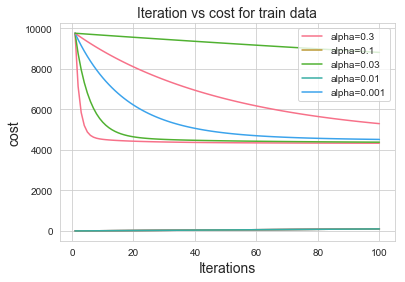

In [324]:
# Threshold constant - TRAIN Data
X = xtrain_15vars
y = ytrain
beta_values = initial_betas(X.shape[1])
alpha = [0.3,0.1,0.03,0.01,0.001]
#alpha = [0.3,0.1]
iterations = 100
threshold = 0.0001
func = []
for b,a in enumerate(alpha):
    alpha1,beta1,cost1,rmse1 = gradient_descent_linear_reg(X,y,a,beta_values,threshold=threshold,iterations=iterations)
    iteration = np.arange(1,len(cost1)+1)
    func = func + plt.plot(iteration,cost1,)
plt.title('Iteration vs cost for train data', size = 14)
plt.xlabel('Iterations', size = 14)
plt.ylabel('cost', size = 14)
plt.legend(func[:5],['alpha=0.3','alpha=0.1','alpha=0.03','alpha=0.01','alpha=0.001'])

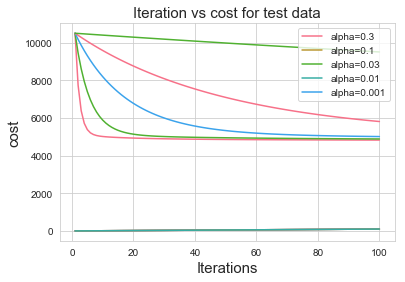

In [326]:
# Threshold constant - TEST Data
X = xtest_15vars
y = ytest
beta_values = initial_betas(X.shape[1])
alpha = [0.3,0.1,0.03,0.01,0.001]
iterations = 100
threshold=0.0001
func = []
for b,a in enumerate(alpha):
    alpha1,beta1,cost1,rmse1 = gradient_descent_linear_reg(X,y,a,beta_values,threshold=threshold,iterations=iterations)
    iteration = np.arange(1,len(cost1)+1)
    func = func + plt.plot(iteration,cost1,)
plt.title('Iteration vs cost for test data', size = 15)
plt.xlabel('Iterations', size = 15)
plt.ylabel('cost', size = 15)
plt.legend(func[:5],['alpha=0.3','alpha=0.1','alpha=0.03','alpha=0.01','alpha=0.001'])

In [484]:
gradient_descent_linear_reg(xtrain_15vars, ytrain, 0.1, initial_betas(xtrain_15vars.shape[1])) # Threshold = 0.01

[0.1, array([ 96.93426958,  18.39978978,  -3.90657815,  60.86352577,
        -18.09175068, -44.63747147,  44.9751295 , -22.2754822 ,
          4.94490513,  12.6969929 ,  -6.43065447, -21.95115319,
         -5.80958555,   1.54703122,  -3.88722282,   4.35598431]), array([[9.75039317e+03, 1.00000000e+00],
        [8.74635521e+03, 2.00000000e+00],
        [7.95564803e+03, 3.00000000e+00],
        ...,
        [4.31056072e+03, 8.12000000e+02],
        [4.31055071e+03, 8.13000000e+02],
        [4.31054073e+03, 8.14000000e+02]]), 92.8497789909421]

In [476]:
gradient_descent_linear_reg(xtrain_15vars, ytrain, 0.1, initial_betas(xtrain_15vars.shape[1])) # Threshold = 0.0001

[0.1, array([ 96.93426958,  18.20758122,   2.5387217 ,  67.98743899,
        -28.1536285 , -53.21607923,  44.19501016, -21.86694966,
          7.01394874,  12.42981282,  -5.7448068 , -22.31048258,
         -5.13336568,   1.52287908,  -2.69812481,   4.25278129]), array([[9.75039317e+03, 1.00000000e+00],
        [8.74635521e+03, 2.00000000e+00],
        [7.95564803e+03, 3.00000000e+00],
        ...,
        [4.30766127e+03, 2.15800000e+03],
        [4.30766117e+03, 2.15900000e+03],
        [4.30766107e+03, 2.16000000e+03]]), 92.81875961345752]

In [472]:
gradient_descent_linear_reg(xtrain_15vars, ytrain, 0.1, initial_betas(xtrain_15vars.shape[1])) # Threshold = 0.000001

[0.1, array([ 96.93426958,  18.18831879,   3.1954372 ,  68.69902629,
        -29.16022624, -54.07039963,  44.10248244, -21.828397  ,
          7.2224557 ,  12.39623245,  -5.68191762, -22.34301637,
         -5.06279402,   1.51960493,  -2.57676101,   4.24192945]), array([[9.75039317e+03, 1.00000000e+00],
        [8.74635521e+03, 2.00000000e+00],
        [7.95564803e+03, 3.00000000e+00],
        ...,
        [4.30763217e+03, 3.50600000e+03],
        [4.30763217e+03, 3.50700000e+03],
        [4.30763217e+03, 3.50800000e+03]]), 92.81844825000255]

In [474]:
gradient_descent_linear_reg(xtrain_15vars, ytrain, 0.1, initial_betas(xtrain_15vars.shape[1])) # Threshold = 0.0000001

[0.1, array([ 96.93426958,  18.18685826,   3.24523214,  68.75298075,
        -29.23654923, -54.13517627,  44.09546556, -21.82547405,
          7.23826532,  12.39368563,  -5.67714962, -22.3454829 ,
         -5.05744284,   1.51935661,  -2.56755866,   4.2411066 ]), array([[9.75039317e+03, 1.00000000e+00],
        [8.74635521e+03, 2.00000000e+00],
        [7.95564803e+03, 3.00000000e+00],
        ...,
        [4.30763191e+03, 4.17900000e+03],
        [4.30763191e+03, 4.18000000e+03],
        [4.30763191e+03, 4.18100000e+03]]), 92.81844542790866]

In [483]:
gradient_descent_linear_reg(xtest_15vars, ytest, 0.1, initial_betas(xtest_15vars.shape[1])) # Threshold = 0.01

[0.1, array([ 99.46968417,  20.17087861,  -1.93534432,  67.94110355,
        -34.31558825, -56.14530689,  40.65874285, -11.76212343,
          8.2290488 ,  12.40971098, -13.45028599, -12.73158928,
         -2.02663246,  -0.56202716,  -6.08693483,   3.0842271 ]), array([[1.05010972e+04, 1.00000000e+00],
        [9.44631828e+03, 2.00000000e+00],
        [8.61282286e+03, 3.00000000e+00],
        ...,
        [4.80064277e+03, 9.59000000e+02],
        [4.80063276e+03, 9.60000000e+02],
        [4.80062279e+03, 9.61000000e+02]]), 97.98594582748123]

In [481]:
gradient_descent_linear_reg(xtest_15vars, ytest, 0.1, initial_betas(xtest_15vars.shape[1])) # Threshold = 0.0001

[0.1, array([ 99.46968417,  19.97162144,   4.42056566,  75.23652983,
        -44.43624775, -64.89462265,  39.75343102, -11.25811607,
         10.20503424,  11.98023143, -12.62618861, -13.12498412,
         -1.49765842,  -0.55249231,  -4.77928678,   2.97241887]), array([[1.05010972e+04, 1.00000000e+00],
        [9.44631828e+03, 2.00000000e+00],
        [8.61282286e+03, 3.00000000e+00],
        ...,
        [4.79771234e+03, 2.31900000e+03],
        [4.79771224e+03, 2.32000000e+03],
        [4.79771214e+03, 2.32100000e+03]]), 97.9562365506422]

In [486]:
gradient_descent_linear_reg(xtest_15vars, ytest, 0.1, initial_betas(xtest_15vars.shape[1])) # Threshold = 0.000001

[0.1, array([ 99.46968417,  19.95172579,   5.06020791,  75.96604932,
        -45.44824243, -65.76850146,  39.65834657, -11.20896248,
         10.40272476,  11.93459822, -12.54550182, -13.16312197,
         -1.44393526,  -0.55179524,  -4.64772902,   2.96112891]), array([[1.05010972e+04, 1.00000000e+00],
        [9.44631828e+03, 2.00000000e+00],
        [8.61282286e+03, 3.00000000e+00],
        ...,
        [4.79768299e+03, 3.67900000e+03],
        [4.79768299e+03, 3.68000000e+03],
        [4.79768299e+03, 3.68100000e+03]]), 97.95593899457621]

In [488]:
gradient_descent_linear_reg(xtest_15vars, ytest, 0.1, initial_betas(xtest_15vars.shape[1])) # Threshold = 0.0000001

[0.1, array([ 99.46968417,  19.95021207,   5.10887419,  76.02155346,
        -45.52523815, -65.83498883,  39.65111192, -11.20522281,
         10.41776568,  11.93112611, -12.53936304, -13.16602353,
         -1.43984777,  -0.55174222,  -4.63771963,   2.96026993]), array([[1.05010972e+04, 1.00000000e+00],
        [9.44631828e+03, 2.00000000e+00],
        [8.61282286e+03, 3.00000000e+00],
        ...,
        [4.79768273e+03, 4.36000000e+03],
        [4.79768273e+03, 4.36100000e+03],
        [4.79768273e+03, 4.36200000e+03]]), 97.95593628471146]

In [422]:
# Model fitting using inbuilt packages
result = sm.Logit(train.iloc[:,-1],xtrain_15vars).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.523447
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            energy_high   No. Observations:                13814
Model:                          Logit   Df Residuals:                    13799
Method:                           MLE   Df Model:                           14
Date:                Mon, 16 Sep 2019   Pseudo R-squ.:                  0.2399
Time:                        21:08:39   Log-Likelihood:                -7230.9
converged:                       True   LL-Null:                       -9513.1
                                        LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
lights          0.6854      0.026     26.819      0.000       0.635       0.735
T1              1.0861    

In [467]:
train['pred'] = result.predict(xtrain_15vars)

In [468]:
# Computing false and true positive rates
fpr, tpr, thresholds =roc_curve(train.iloc[:,-2],train.iloc[:,-1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.816926


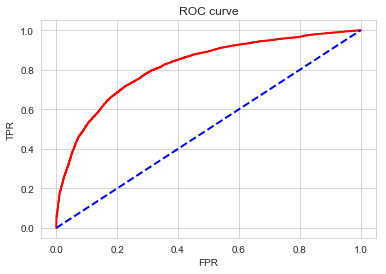

In [469]:
# ROC curve
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve')
# Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

C:\Users\himaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


[]

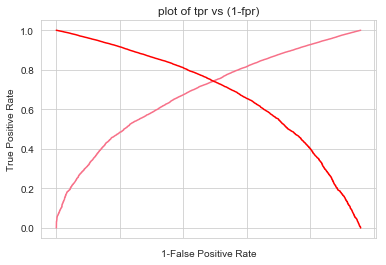

In [470]:
i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr':pd.Series(fpr,index=i),
                    'tpr':pd.Series(tpr,index=i),
                    '1-fpr':pd.Series(1-fpr,index=i),
                    'tf':pd.Series(tpr-(1-fpr),index=i),
                    'thresholds':pd.Series(thresholds,index=i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'],color='red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('plot of tpr vs (1-fpr)')
ax.set_xticklabels([])

#### 10 random variables

##### Train Data

In [498]:
x = xtrain_10rand.values
y = ytrain.values
(n,r) = x.shape
ones = np.ones((n,1))
x = np.hstack((ones,x))
r += 1
b = np.linalg.solve(x.T@x,x.T@y)
b

array([ 96.93426958,  15.42773157,  49.39496614, -20.65801875,
        35.9998126 , -12.42305447,  10.45291248, -26.71546762,
         7.14730113, -46.15101434,   0.71987784])

In [189]:
initial_betas(xtrain_10rand.shape[1])

array([ 0.39293837, -0.42772133, -0.54629709,  0.10262954,  0.43893794,
       -0.15378708,  0.9615284 ,  0.36965948, -0.0381362 , -0.21576496,
       -0.31364397])

In [492]:
import time
st = time.time()
alpha,beta,cost,rmse = gradient_descent_linear_reg(xtrain_10rand, ytrain, 0.1, initial_betas(xtrain_10rand.shape[1]))
print(time.time()-st)

4.907835960388184


In [493]:
alpha,beta,cost,rmse

(0.1, array([ 96.93426958,  15.42805072,  49.39257919, -20.65999192,
         35.99528826, -12.41399099,  10.44969271, -26.71983828,
          7.14276943, -46.13918798,   0.71999664]), array([[9.76595129e+03, 1.00000000e+00],
        [8.80810408e+03, 2.00000000e+00],
        [8.03297081e+03, 3.00000000e+00],
        ...,
        [4.39188919e+03, 1.39000000e+03],
        [4.39188919e+03, 1.39100000e+03],
        [4.39188919e+03, 1.39200000e+03]]), 93.7218137644724)

In [365]:
import time
st = time.time()
alpha2,beta2,cost2,rmse2 = gradient_descent_logistic_reg(xtrain_10rand, ytrain2, 0.01, initial_betas(xtrain_10rand.shape[1]))
print(time.time()-st)

1.494004249572754


In [366]:
alpha2,beta2,cost2,rmse2

(0.01, array([-0.04748162,  0.41524924, -0.27717071,  0.02723989,  0.26818935,
        -0.14643175,  0.78566515,  0.00595056,  0.0850104 , -0.48714544,
        -0.08364644]), array([[8.70267422e-01, 1.00000000e+00],
        [8.69059786e-01, 2.00000000e+00],
        [8.67857498e-01, 3.00000000e+00],
        ...,
        [6.18844462e-01, 6.21000000e+02],
        [6.18744300e-01, 6.22000000e+02],
        [6.18644420e-01, 6.23000000e+02]]), 1.1123348593399884)

##### Test Data 

In [263]:
initial_betas(test_10rand.shape[1])

array([ 0.39293837, -0.42772133, -0.54629709,  0.10262954,  0.43893794,
       -0.15378708,  0.9615284 ,  0.36965948, -0.0381362 , -0.21576496,
       -0.31364397])

In [494]:
gradient_descent_linear_reg(test_10rand, ytest, 0.1, initial_betas(test_10rand.shape[1]))

[0.1, array([ 99.46968417,  17.02317514,  50.3966608 , -21.8128486 ,
         32.1935779 , -11.26731475,  10.32585427, -28.56585824,
          6.90880946, -43.28517825,   0.36965826]), array([[1.05176617e+04, 1.00000000e+00],
        [9.50825122e+03, 2.00000000e+00],
        [8.69002561e+03, 3.00000000e+00],
        ...,
        [4.87188966e+03, 1.40400000e+03],
        [4.87188966e+03, 1.40500000e+03],
        [4.87188966e+03, 1.40600000e+03]]), 98.71058366628468]

In [369]:
gradient_descent_logistic_reg(test_10rand, ytest2, 0.01, initial_betas(test_10rand.shape[1]))

[0.01,
 array([-5.52933057e-03,  3.83592295e-01, -3.20053000e-01,  1.07405435e-04,
         2.76803779e-01, -1.35788798e-01,  7.89709436e-01,  2.08888727e-02,
         6.04894183e-02, -4.81969206e-01, -7.18394121e-02]),
 array([[  0.86443901,   1.        ],
        [  0.86322895,   2.        ],
        [  0.86202476,   3.        ],
        ...,
        [  0.62578699, 595.        ],
        [  0.62568672, 596.        ],
        [  0.62558674, 597.        ]]),
 1.118558665143362]

#### 10 Best suited variables

##### Train Data

In [499]:
x = xtrain_10vars.values
y = ytrain.values
(n,r) = x.shape
ones = np.ones((n,1))
x = np.hstack((ones,x))
r += 1
b = np.linalg.solve(x.T@x,x.T@y)
b

array([ 96.93426958,  16.89493667,  73.15952374, -41.26837015,
       -63.01083481,  37.63332687,   7.85231437,  15.87809363,
       -28.37273321,  -2.13849244,   5.88142486])

In [195]:
initial_betas(xtrain_10vars.shape[1])

array([ 0.39293837, -0.42772133, -0.54629709,  0.10262954,  0.43893794,
       -0.15378708,  0.9615284 ,  0.36965948, -0.0381362 , -0.21576496,
       -0.31364397])

In [370]:
import time
st = time.time()
alpha,beta,cost,rmse = gradient_descent_linear_reg(xtrain_10vars, ytrain, 0.1, initial_betas(xtrain_10vars.shape[1]))
print(time.time()-st)

4.253622770309448


In [371]:
alpha,beta,cost ,rmse

(0.1, array([ 96.93426958,  16.89150258,  72.74433089, -40.8461786 ,
        -62.49377097,  37.36473565,   7.76977537,  15.85380094,
        -28.38294629,  -2.21502475,   5.88468898]), array([[9.77104134e+03, 1.00000000e+00],
        [8.76548721e+03, 2.00000000e+00],
        [7.97167554e+03, 3.00000000e+00],
        ...,
        [4.35069350e+03, 1.30000000e+03],
        [4.35069340e+03, 1.30100000e+03],
        [4.35069330e+03, 1.30200000e+03]]), 93.28122319605384)

In [372]:
import time
st = time.time()
alpha2,beta2,cost2,rmse2 = gradient_descent_logistic_reg(xtrain_10vars, ytrain2, 0.01, initial_betas(xtrain_10vars.shape[1]))
print(time.time()-st)

1.3179140090942383


In [373]:
alpha2,beta2,cost2,rmse2

(0.01, array([-0.02966525,  0.3570073 , -0.3448404 ,  0.21813475,  0.32555366,
        -0.17800264,  0.83054327,  0.41576093, -0.37299657, -0.32814417,
        -0.0382961 ]), array([[  0.82533367,   1.        ],
        [  0.82430316,   2.        ],
        [  0.82327721,   3.        ],
        ...,
        [  0.61010763, 567.        ],
        [  0.61000749, 568.        ],
        [  0.60990767, 569.        ]]), 1.104452506118489)

##### Test Data

In [266]:
initial_betas(xtest_10vars.shape[1])

array([ 0.39293837, -0.42772133, -0.54629709,  0.10262954,  0.43893794,
       -0.15378708,  0.9615284 ,  0.36965948, -0.0381362 , -0.21576496,
       -0.31364397])

In [375]:
gradient_descent_linear_reg(xtest_10vars, ytest, 0.1, initial_betas(xtest_10vars.shape[1]))

[0.1, array([ 99.46968417,  19.4105458 ,  76.2047718 , -50.65294196,
        -70.4827455 ,  39.45425929,   7.77857282,  12.95738333,
        -21.13000038,  -5.26400336,   4.03674366]), array([[1.05225142e+04, 1.00000000e+00],
        [9.46684976e+03, 2.00000000e+00],
        [8.63112996e+03, 3.00000000e+00],
        ...,
        [4.81912709e+03, 1.33200000e+03],
        [4.81912699e+03, 1.33300000e+03],
        [4.81912689e+03, 1.33400000e+03]]), 98.17460865320994]

In [376]:
gradient_descent_logistic_reg(xtest_10vars, ytest2, 0.01, initial_betas(xtest_10vars.shape[1]))

[0.01, array([ 0.01494451,  0.3221453 , -0.38443507,  0.20858211,  0.29883371,
        -0.17360818,  0.83937422,  0.41761278, -0.33216824, -0.3338777 ,
        -0.04959747]), array([[  0.81988242,   1.        ],
        [  0.81887743,   2.        ],
        [  0.81787718,   3.        ],
        ...,
        [  0.6201617 , 535.        ],
        [  0.6200617 , 536.        ],
        [  0.61996204, 537.        ]]), 1.113518785985965]